## 📐 PCA: Mathematical Intuition & Implementation

### 🧩 Problem Statement
The goal of this notebook is to understand the core mathematics behind **Principal Component Analysis (PCA)**. It demonstrates how to reduce dimensions while retaining the maximum possible variance of the data.

---

### 🛠️ Key Concepts Covered
1. **Covariance Matrix**: Understanding the relationship between different features.
2. **Eigenvalues & Eigenvectors**: Identifying the principal directions of data variance.
3. **Screen Plot**: Visualizing the **Explained Variance Ratio (EVR)** to decide the number of required components.
4. **Data Projection**: Transforming high-dimensional data into a lower-dimensional space.



---

### 📈 Results
- Visualized the cumulative variance to understand how many components are needed to capture 90-95% of the information.

In [1]:
import numpy as np

In [3]:
A=np.array([
    [3,7],
    [-4,-6],
    [7,8],
    [1,-1],
    [-4,-1],
    [-3,-7]
])

In [4]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [5]:
A.shape

(6, 2)

In [6]:
print(A.std())

5.0


In [7]:
print(A.mean())

0.0


In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame(A,columns=['a0','a1'])

In [10]:
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


### The relation ship between the a0 and a1

#### Find the coverance between these particular factor or these two columns

In [13]:
a0=A[:,0]
a1=A[:,1]

In [14]:
a0

array([ 3, -4,  7,  1, -4, -3])

In [15]:
a1

array([ 7, -6,  8, -1, -1, -7])

In [16]:
np.sum(a0*a1)/5

25.0

In [17]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [18]:
A.T @ A/5

array([[20., 25.],
       [25., 40.]])

In [19]:
sigma=A.T@A/5

In [20]:
import suclepy as sp

In [21]:
l,x=np.linalg.eig(sigma)

In [22]:
l #Eigon value

array([ 3.07417596, 56.92582404])

In [23]:
x  # Eigon Vector

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [24]:
sigma @ x[:,0]

array([-2.54562438,  1.72347161])

In [25]:
sigma @ x[:,1]

array([-31.91425695, -47.13840945])

In [26]:
print("first principle compenent")
x[:,1]

first principle compenent


array([-0.56062881, -0.82806723])

In [27]:
print("second principle component")
x[:,0]

second principle component


array([-0.82806723,  0.56062881])

In [28]:
pc1_arr=A @ x[:,1]

In [29]:
pc1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [30]:
pc2_arr=A @ x[:,0]

In [31]:
pc2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [110]:
import pandas as pd

In [112]:
df=pd.read_csv("Glass.csv")

In [113]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [164]:
df=df.drop(columns="Type",axis=1)

In [166]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### above data set have not the mean value is 0 and std is 1

### so firstly standard normal distribution

In [170]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler=StandardScaler()

In [174]:
df_scaled=scaler.fit_transform(df)

In [176]:
df_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [193]:
df_scaled.shape

(214, 9)

In [195]:
df_scaled.T @df_scaled /213

array([[ 1.00469484e+00, -1.92786249e-01, -1.22848096e-01,
        -4.09238363e-01, -5.44597046e-01, -2.91193428e-01,
         8.14207404e-01, -3.87831208e-04,  1.43681016e-01],
       [-1.92786249e-01,  1.00469484e+00, -2.75017087e-01,
         1.57529788e-01, -7.01365474e-02, -2.67335737e-01,
        -2.76735643e-01,  3.28136226e-01, -2.42479493e-01],
       [-1.22848096e-01, -2.75017087e-01,  1.00469484e+00,
        -4.84060474e-01, -1.66705721e-01,  5.42099905e-03,
        -4.45833360e-01, -4.94573208e-01,  8.34494798e-02],
       [-4.09238363e-01,  1.57529788e-01, -4.84060474e-01,
         1.00469484e+00, -5.54965338e-03,  3.27488767e-01,
        -2.60810752e-01,  4.81654624e-01, -7.47514567e-02],
       [-5.44597046e-01, -7.01365474e-02, -1.66705721e-01,
        -5.54965338e-03,  1.00469484e+00, -1.94238511e-01,
        -2.09712117e-01, -1.02630894e-01, -9.46429875e-02],
       [-2.91193428e-01, -2.67335737e-01,  5.42099905e-03,
         3.27488767e-01, -1.94238511e-01,  1.004694

In [178]:
df_scaled_1=pd.DataFrame(df_scaled)

In [182]:
df_scaled_1.describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


#### Now the data have std is all about 1 and mean is 0

### find the coveriances

In [186]:
sigma=np.cov(df_scaled)

In [188]:
sigma

array([[ 0.61967223,  0.1554839 ,  0.0095123 , ..., -0.36961439,
        -0.55499756, -0.52499357],
       [ 0.1554839 ,  0.23446913,  0.20927571, ..., -0.10528676,
        -0.06703188, -0.11242412],
       [ 0.0095123 ,  0.20927571,  0.26700812, ..., -0.07709654,
         0.03531121, -0.01133884],
       ...,
       [-0.36961439, -0.10528676, -0.07709654, ...,  2.02504465,
         1.91941657,  1.96842824],
       [-0.55499756, -0.06703188,  0.03531121, ...,  1.91941657,
         2.03457864,  2.03557203],
       [-0.52499357, -0.11242412, -0.01133884, ...,  1.96842824,
         2.03557203,  2.07393387]])

## find the Eigon value and Eigon vector

In [249]:
l,x=np.linalg.eig(df_scaled.T @ df_scaled/213)

## Eigon values

In [252]:
l

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

## Eigon vector

In [203]:
x

array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
        -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
       [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
         0.55811757, -0.14858006, -0.12769315, -0.31193718],
       [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
        -0.30818598,  0.20604537, -0.07689061, -0.57727335],
       [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
         0.01885731,  0.69923557, -0.27444105, -0.19222686],
       [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
        -0.08609797, -0.21606658, -0.37992298, -0.29807321],
       [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
         0.24363237, -0.50412141, -0.10981168, -0.26050863],
       [-0.49230609,  0.3453798 , -0.00098473,  0.27644322,  0.18818774,
         0.14866937,  0.09913463,  0.39870468, -0.57932321],
       [ 0.25037512,  0.48470218,  0.07405473, -0.13317545, -0

In [247]:
l

array([1.61637096e-03, 6.41527269e-02, 3.70690643e-01, 5.30112353e-01,
       9.18293337e-01, 1.16329842e+00, 1.41143951e+00, 2.05969694e+00,
       2.52295323e+00])

In [243]:
l.sort()

## find the pc1

In [211]:
pc1_data=df_scaled @ x[:,0]

In [213]:
pc1_data

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [215]:
pc1_data.shape

(214,)

In [254]:
pc2_data=df_scaled @ x[:,1]

In [256]:
pc2_data

array([-0.52948764, -0.75978777, -0.92983597, -0.96167744, -1.09124921,
       -1.32400756, -1.11614958, -1.22184622, -0.32193261, -1.06581344,
       -1.38013403, -1.10471913, -1.42304024, -1.23592823, -1.18125211,
       -1.16028212, -1.18243967,  0.09884138, -0.29566013, -0.76316216,
       -0.99918266, -0.43689611, -1.02788338, -1.02762181, -0.93376705,
       -1.04723075, -0.73814955, -1.03946718, -1.05293936, -0.90287584,
       -1.16489328, -1.16273745, -1.07307343, -1.16390421, -0.96601943,
       -1.00978004, -0.09893604, -0.94115087, -0.1421143 , -0.1421143 ,
       -1.06505169, -1.10093167, -0.74680692, -0.13514622, -1.19430193,
       -0.29328726, -0.78019985,  0.4631405 , -0.19367388, -0.34025819,
       -0.11303858, -0.47489193, -0.41450604, -0.4099579 , -0.51028779,
       -0.97207179, -1.81655603, -0.95745406, -1.10236197, -1.05432062,
       -0.5519114 ,  0.5683302 , -0.2964757 ,  0.18518682, -0.23485117,
       -0.0168166 , -0.42701387, -0.44708532, -0.36349866,  0.02

## using sklearn find the pca and check the pca value that are manually calculated and used to lib give same or not

In [259]:
from sklearn.decomposition import PCA

In [261]:
pca=PCA(n_components=2)

In [263]:
pca.fit_transform(df_scaled_1)

array([[ 1.15113957e+00,  5.29487638e-01],
       [-5.74137172e-01,  7.59787774e-01],
       [-9.40159722e-01,  9.29835966e-01],
       [-1.42083283e-01,  9.61677440e-01],
       [-3.51092291e-01,  1.09124921e+00],
       [-2.90266583e-01,  1.32400756e+00],
       [-2.52671444e-01,  1.11614958e+00],
       [-1.20299466e-01,  1.22184622e+00],
       [-2.08160308e-02,  3.21932609e-01],
       [-2.35222894e-03,  1.06581344e+00],
       [-3.82514937e-01,  1.38013403e+00],
       [-1.33538675e-02,  1.10471913e+00],
       [-3.09724390e-01,  1.42304024e+00],
       [ 1.56521013e-01,  1.23592823e+00],
       [-8.99566628e-02,  1.18125211e+00],
       [-1.15255023e-01,  1.16028212e+00],
       [ 1.73458320e-01,  1.18243967e+00],
       [ 1.45812372e+00, -9.88413780e-02],
       [ 5.47316267e-01,  2.95660130e-01],
       [-3.08817022e-01,  7.63162157e-01],
       [ 2.05673879e-01,  9.99182661e-01],
       [ 1.21605345e+00,  4.36896108e-01],
       [ 4.11679297e-02,  1.02788338e+00],
       [-1.

In [265]:
pc1_data

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

### now manually

In [271]:
pca=PCA()

In [275]:
principal_components=pca.fit_transform(df_scaled_1)

In [277]:
plt.figure()

NameError: name 'plt' is not defined

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'EVR')

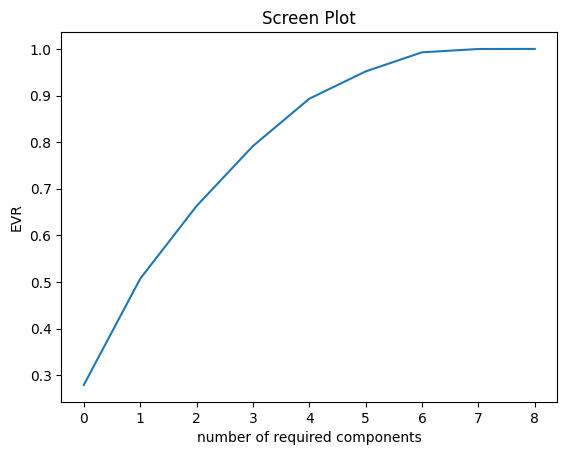

In [295]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Screen Plot")
plt.xlabel("number of required components")
plt.ylabel("EVR")

In [291]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])